In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


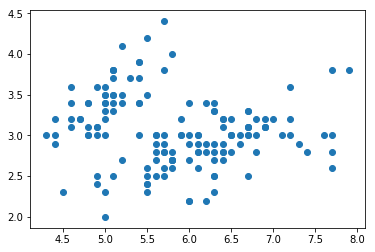

In [5]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

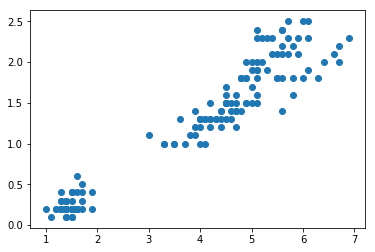

In [6]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [9]:
df1=df.drop(["sepal length (cm)","sepal width (cm)"],axis=1)
df1.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
yp=km.fit_predict(df1)

In [18]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [4.26923077, 1.34230769],
       [5.59583333, 2.0375    ]])

In [14]:
df1["cluster"]=yp

In [16]:
df1.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [17]:
c1=df1[df1.cluster==0]
c2=df1[df1.cluster==1]
c3=df1[df1.cluster==2]

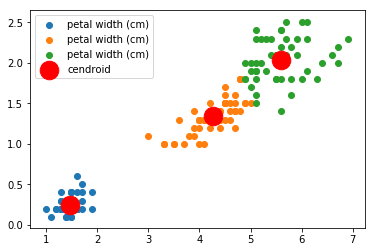

In [21]:
plt.scatter(c1["petal length (cm)"],c1["petal width (cm)"])
plt.scatter(c2["petal length (cm)"],c2["petal width (cm)"])
plt.scatter(c3["petal length (cm)"],c3["petal width (cm)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=345,label="cendroid",color='red')
plt.legend()

In [24]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df1[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)
sse    

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.477123363965468,
 13.916908757908757,
 11.03633387775173,
 9.265635950878515,
 7.777663268844047,
 6.545263125763126]

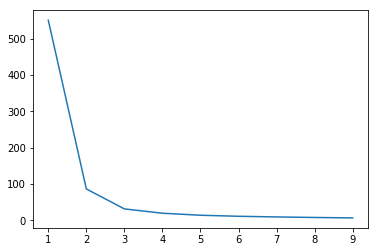

In [25]:
plt.plot(k_rng,sse)
